In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re

First we filter the original csv to keep rows that are relevant

In [2]:
# Define the input directory and output file
input_directory = '../data/saccade/'  # Update with your directory path

In [3]:
# Iterate over all CSV files in the specified directory
for file_path in glob.glob(os.path.join(input_directory, '*.csv')):
   # Extract filename without extension
    filename = os.path.splitext(os.path.basename(file_path))[0]  # e.g., "Saccade_easy1_first"
    
    # Load each CSV file into a DataFrame, skipping the first 6 rows
    df = pd.read_csv(file_path, skiprows=6, keep_default_na=False)
    
    # Construct output file path
    output_file = f"../data/saccade_filtered/{filename}.csv"
     
    df["Respondent Name"] = df["Respondent Name"].astype(int)

    # if ((df["Respondent Name"] == 20009) & df['Study Name'].str.contains("easy 1", na=False)).any():
    #     print("Respondent 20009 still present in 'easy 1' at the beginning", file_path)
        
    # Drop specific columns if they exist in the DataFrame
    columns_to_drop = ["Respondent Gender", "Respondent Age", "Respondent Group", "Stimulus Label", "Stimulus Start", "Stimulus Duration", "Saccade Index", "Saccade Index by Stimulus", "Saccade Type", "Saccade Index by AOI", "Dwell Index (on AOI)",
                   "AOI Instance Duration", "AOI Instance Start", "AOI Type", "AOI Intersections", "Saccade Direction", "AOI Instance"]
    
    df = df.drop([col for col in columns_to_drop if col in df.columns], axis='columns')
        
    #Drop participants where ET is lower than 85
    df.drop(df[(df['Study Name'].str.contains("easy 1", na=False)) & (df["Respondent Name"]==20020)].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df["Respondent Name"]==20014)].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df["Respondent Name"]==20020)].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df["Respondent Name"]==20022)].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df["Respondent Name"]==20028)].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("hard 1", na=False)) & (df["Respondent Name"]==20025)].index, inplace=True)
    
    #Drop rows where they are expliclty omitted
    df.drop(df[(df["Respondent Name"]==20019)].index, inplace=True)
    df.drop(df[(df["Respondent Name"]==20040)].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 1", na=False)) & (df["Respondent Name"]==20012)].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df["AOI Label"].str.lower().str.contains(rf'\b{re.escape("crack 19")}\b', na=False, regex=True))].index, inplace=True)
    
    #Drop cracks that are all hit
    df.drop(df[(df['Study Name'].str.contains("easy 1", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 3 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 3 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 10 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 14 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("easy 2", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 15 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("hard 1", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 4 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("hard 1", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 5 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("hard 1", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 17 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("hard 1", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 20 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("hard 2", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 4 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("hard 2", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 15 hit", na=False))].index, inplace=True)
    df.drop(df[(df['Study Name'].str.contains("hard 2", na=False)) & (df['AOI Label'].str.lower().str.contains("crack 16 hit", na=False))].index, inplace=True)
     
    
    # if ((df["Respondent Name"] == 20009) & df['Study Name'].str.contains("easy 1", na=False)).any():
    #     print("Respondent 20009 still present in 'easy 1' after dropping some rows", file_path)
           
    # Drop rows where gaze is a poor calibration
    df = df[df["Gaze Calibration"] != "Poor"]
        
    # df = df[df["AOI Label"] != "NA"]
    df = df[df["AOI Label"].str.contains("crack", case=False, na=False)]

    
    # Step 5: Drop "base" rows after computing statistics
    df = df[~df["AOI Label"].str.contains("base", case=False, na=False)]

    # if ((df["Respondent Name"] == 20009) & df['Study Name'].str.contains("easy 1", na=False) ).any():
    #     print("Respondent 20009 still present in 'easy 1' after droppin NA and poor calibration", file_path)
    
    # Rename the study name
    if "easy1" in filename.lower():
        df["Study Name"] = "Bridge 1"
    elif "easy2" in filename.lower():
        df["Study Name"] = "Bridge 2"
    elif "hard1" in filename.lower():
        df["Study Name"] = "Bridge 3"
    elif "hard2" in filename.lower():
        df["Study Name"] = "Bridge 4"
    else:
        print("This shouldnt happen.")
        
    # Save the combined DataFrame to a single CSV file
    df.to_csv(output_file, index=False)
    print(f"Combined data before outlier filtering saved to {output_file}")
    

Combined data before outlier filtering saved to ../data/saccade_filtered/SaccadeTable_easy1_second.csv
Combined data before outlier filtering saved to ../data/saccade_filtered/SaccadeTable_easy2_first.csv
Combined data before outlier filtering saved to ../data/saccade_filtered/SaccadeTable_hard2_second.csv
Combined data before outlier filtering saved to ../data/saccade_filtered/SaccadeTable_hard2_first.csv


/var/folders/mn/_5nfz9ts7nb2bwvk93j7h3800000gn/T/ipykernel_2549/69076770.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, skiprows=6, keep_default_na=False)


Combined data before outlier filtering saved to ../data/saccade_filtered/SaccadeTable_hard1_second.csv
Combined data before outlier filtering saved to ../data/saccade_filtered/SaccadeTable_easy1_first.csv
Combined data before outlier filtering saved to ../data/saccade_filtered/SaccadeTable_hard1_first.csv
Combined data before outlier filtering saved to ../data/saccade_filtered/SaccadeTable_easy2_second.csv


In [4]:
 #Normalization

# Process each file separately
input_directory = "../data/saccade_filtered/"
normalized_dfs = []
total_data_count = 0
saccade_amplitude_count = 0
saccade_peak_velocity_count = 0
saccade_duration_count = 0
saccade_acc_count = 0
saccade_deac_count = 0
filtered_row = {"Saccade Amplitude": [], "Saccade Peak Velocity": [], "Saccade Duration": [], "Saccade Peak Acceleration": [], "Saccade Peak Deceleration": []}


for file_path in glob.glob(os.path.join(input_directory, '*.csv')):
    # Load each CSV file into a DataFrame, skipping the first 6 rows
    df = pd.read_csv(file_path, keep_default_na=False)
    
    # Initialize a dictionary to collect participant-specific data for calculating statistics
    participants_collection = {}

    # Collecting data for each participant
    for index, row in df.iterrows():
        study = row["Study Name"]
        participant = row["Respondent Name"]
        saccade_amp = row["Saccade Amplitude"]
        saccade_peak_vel = row["Saccade Peak Velocity"] 
        saccade_duration = row["Saccade Duration"]
        saccade_acc = row["Saccade Peak Acceleration"]
        saccade_deac = row["Saccade Peak Deceleration"]
        
        #No negative value for velocity
        # if saccade_peak_vel !="NA" and saccade_peak_vel <0:
        #     print(saccade_peak_vel)
            
        if participant not in participants_collection:
            participants_collection[participant] = {
                'Saccade Amplitude': [],
                'Saccade Peak Velocity': [],
                'Saccade Duration': [],
                "Saccade Peak Acceleration": [],
                "Saccade Peak Deceleration": []
            }
        

        participants_collection[participant]["Saccade Amplitude"].append(saccade_amp)
        participants_collection[participant]["Saccade Peak Velocity"].append(abs(saccade_peak_vel))
        participants_collection[participant]["Saccade Duration"].append(saccade_duration)
        participants_collection[participant]["Saccade Peak Acceleration"].append(saccade_acc)
        participants_collection[participant]["Saccade Peak Deceleration"].append(saccade_deac)
        

    # Calculate mean and std for each participant
    participants_stats = {}

    def get_stats(data):
        cleaned_data = [float(x) for x in data if x != "NA"]
        mean_value = np.mean(cleaned_data)
        std_dev = np.std(cleaned_data)
        return [mean_value, std_dev]

    for participant, data in participants_collection.items():
        participants_stats[participant] = {
            "Saccade Amplitude": get_stats(data["Saccade Amplitude"]),
            "Saccade Peak Velocity": get_stats(data["Saccade Peak Velocity"]),
            "Saccade Duration": get_stats(data["Saccade Duration"]),
            "Saccade Peak Acceleration": get_stats(data["Saccade Peak Acceleration"]),
            "Saccade Peak Deceleration": get_stats(data["Saccade Peak Deceleration"])
        }

    # **Normalize the Data**
    for index, row in df.iterrows():
        participant = row["Respondent Name"]
        saccade_amp = row["Saccade Amplitude"]
        saccade_peak_vel = row["Saccade Peak Velocity"]
        saccade_duration = row["Saccade Duration"]
        saccade_acc = row["Saccade Peak Acceleration"]
        saccade_deac = row["Saccade Peak Deceleration"]

        participant_stat_amp = participants_stats[participant]["Saccade Amplitude"]
        participant_stat_vel = participants_stats[participant]["Saccade Peak Velocity"]
        participant_stat_duration = participants_stats[participant]["Saccade Duration"]
        participant_stat_acc = participants_stats[participant]["Saccade Peak Acceleration"]
        participant_stat_deac = participants_stats[participant]["Saccade Peak Deceleration"]

        if saccade_amp != "NA":
            df.loc[index, "Saccade Amplitude"] = (float(saccade_amp) - participant_stat_amp[0]) / participant_stat_amp[1]

        if saccade_peak_vel != "NA":
            df.loc[index, "Saccade Peak Velocity"] = (float(saccade_peak_vel) - participant_stat_vel[0]) / participant_stat_vel[1]
        
        if saccade_duration != "NA":
            df.loc[index, "Saccade Duration"] = (float(saccade_duration) - participant_stat_duration[0]) / participant_stat_duration[1]
        
        if saccade_acc != "NA":
            df.loc[index, "Saccade Peak Acceleration"] = (float(saccade_acc) - participant_stat_acc[0]) / participant_stat_acc[1]
        
        if saccade_deac != "NA":
            df.loc[index, "Saccade Peak Deceleration"] = (float(saccade_deac) - participant_stat_deac[0]) / participant_stat_deac[1]

    # **Now, filter outliers based on normalized values**

    def check_range(data):
        return -3.5 <= data <= 3.5  # Keeping values within 3.5 standard deviations

    for index, row in df.iterrows():
        participant = row["Respondent Name"]
        saccade_amp = row["Saccade Amplitude"]
        saccade_peak_vel = row["Saccade Peak Velocity"]
        saccade_duration = row["Saccade Duration"]
        saccade_acc = row["Saccade Peak Acceleration"]
        saccade_deac = row["Saccade Peak Deceleration"]

        if saccade_amp != "NA":
            saccade_amplitude_count += 1
        if saccade_peak_vel != "NA":
            saccade_peak_velocity_count += 1
        if saccade_duration != "NA":
            saccade_duration_count += 1
        if saccade_acc !="NA":
            saccade_acc_count+=1
        if saccade_deac!="NA":
            saccade_deac_count +=1

        if saccade_amp != "NA" and not check_range(saccade_amp):
            df.loc[index, "Saccade Amplitude"] = "NA"
            filtered_row["Saccade Amplitude"].append((index, participant))

        if saccade_peak_vel != "NA" and not check_range(saccade_peak_vel):
            df.loc[index, "Saccade Peak Velocity"] = "NA"
            filtered_row["Saccade Peak Velocity"].append((index, participant))
            
        if saccade_duration != "NA" and not check_range(saccade_duration):
            df.loc[index, "Saccade Duration"] = "NA"
            filtered_row["Saccade Duration"].append((index, participant))
        
        if saccade_acc != "NA" and not check_range(saccade_acc):
            df.loc[index, "Saccade Peak Acceleration"] = "NA"
            filtered_row["Saccade Peak Acceleration"].append((index, participant))
            
        if saccade_deac != "NA" and not check_range(saccade_deac):
            df.loc[index, "Saccade Peak Acceleration"] = "NA"
            filtered_row["Saccade Peak Deceleration"].append((index, participant))
    
    normalized_dfs.append(df)

# print(filtered_row)
print("percentage of saccade ampitude filtered: ", len(filtered_row['Saccade Amplitude'])/saccade_amplitude_count)
print("percentage of peak velocity filtered: ", len(filtered_row['Saccade Peak Velocity'])/saccade_peak_velocity_count)
print("percentage of saccade duration filtered: ", len(filtered_row['Saccade Duration'])/saccade_duration_count)
print("percentage of saccade acceleration filtered: ", len(filtered_row['Saccade Peak Acceleration'])/saccade_acc_count)
print("percentage of saccade deceleration filtered: ", len(filtered_row['Saccade Peak Deceleration'])/saccade_deac_count)
    

# Concatenate all normalized DataFrames
final_df = pd.concat(normalized_dfs, ignore_index=True)

# Sort by "Study Name" first in the specified order, then by "Respondent" numerically
study_order = ["Bridge 1", "Bridge 2", "Bridge 3", "Bridge 4"]
final_df['Study Name'] = pd.Categorical(final_df['Study Name'], categories=study_order, ordered=True)
final_df = final_df.sort_values(by=['Study Name', 'Respondent Name'])


# Save the combined DataFrame to a single CSV file
output_file = "../data/saccade_processing/combined_no_outlier_saccade_table.csv"
final_df.to_csv(output_file, index=False)
print(f"Combined data after outlier filtering saved to {output_file}")
        

percentage of saccade ampitude filtered:  0.012373717597305975
percentage of peak velocity filtered:  0.009121041298720151
percentage of saccade duration filtered:  0.009145235042218083
percentage of saccade acceleration filtered:  0.00880616675611065
percentage of saccade deceleration filtered:  0.008216413607534116
Combined data after outlier filtering saved to ../data/saccade_processing/combined_no_outlier_saccade_table.csv


#Choose a timecard

In [8]:
# # Standardize columns by stripping whitespace and converting to lowercase for consistency
# combined_df["Study Name"] = combined_df["Study Name"].str.strip().str.lower()
# combined_df["Respondent Name"] = combined_df["Respondent Name"].astype(str).str.strip()
# combined_df["AOI Label"] = combined_df["AOI Label"].str.strip().str.lower()

# combined_timecard_df["Study Name"] = combined_timecard_df["Study Name"].str.strip().str.lower()
# combined_timecard_df["Respondent"] = combined_timecard_df["Respondent"].astype(str).str.strip()
# combined_timecard_df["Label"] = combined_timecard_df["Label"].str.strip().str.lower()
combined_df = pd.read_csv('../data/saccade_processing/combined_no_outlier_saccade_table.csv')
combined_df['weight'] = 1
rows_to_drop =[]
half_weight=0
# Iterate through each row in the DataFrame
combined_timecard_df= pd.read_csv('../data/timecards/combined_timecard_5seconds.csv', skiprows=0)

for index, row in combined_df.iterrows():
    study = row["Study Name"]
    participant = int(row["Respondent Name"])
    aoiLabel = row["AOI Label"]
    saccade_start = row["Saccade Start"]
    saccade_end = row["Saccade End"]
    
    time_row = combined_timecard_df[(combined_timecard_df["Respondent"]==participant) & (combined_timecard_df["Label"]==aoiLabel) & (combined_timecard_df["Study Name"]==study)] #There should be a unique match
    
    if time_row.empty:
        # print("Row empty: ", participant, aoiLabel, study) #No timecard for that
        continue
    if time_row.shape[0] > 1:
        print("Multiple rows: ", participant, aoiLabel, study) #This shouldn't happen
        print(time_row)
    
    start = time_row["Start"].values[0]
    end = time_row["End"].values[0]
    
    #drop the rows if saccade is outside the range completely
    if saccade_end < start or saccade_start > end:
        if (participant == 20002) & (study == "Bridge 3") & ("Crack 6" in aoiLabel):
            print(index, start, end, saccade_start, saccade_end)
        rows_to_drop.append(index)
    
    #saccade is partially covered by time window
    if saccade_start < start or saccade_end > end: 
        half_weight +=1
        combined_df.loc[index, 'weight'] = 0.5



# Drop the rows from the original DataFrame
df_filtered = combined_df.drop(rows_to_drop)

# Count the number of rows where 'weight' equals 0.5
count = df_filtered[df_filtered['weight'] == 0.5].shape[0]

# Print the result
print(f'Number of rows where weight is 0.5: {count}')

print(len(rows_to_drop))
print(half_weight)

#Drop columns
columns_to_drop = [ "Gaze Calibration", "Saccade Start", "Saccade End"]

# Drop columns only if they exist in the DataFrame
df_filtered = df_filtered.drop([col for col in columns_to_drop if col in df_filtered.columns], axis='columns')

# Save the modified DataFrame to a new CSV file (optional)
df_filtered.to_csv('../data/saccade_processing/combined_filtered_SaccadeTable_5seconds.csv', index=False)

print(len(df_filtered))
        
    

19155 372962.84 374462.84 374765.455 374773.803
19156 372962.84 374462.84 374782.164 374790.504
19157 372962.84 374462.84 374898.895 374907.171
19158 372962.84 374462.84 374982.134 374998.861
19159 372962.84 374462.84 375040.494 375057.209
19160 372962.84 374462.84 375232.19 375240.524
19161 372962.84 374462.84 375273.811 375323.815
19162 372962.84 374462.84 375382.19 375390.489
19163 372962.84 374462.84 375398.823 375407.192
19164 372962.84 374462.84 375515.57 375548.916
19165 372962.84 374462.84 375557.247 375565.579
19166 372962.84 374462.84 375798.842 375807.189
Number of rows where weight is 0.5: 296
18954
19250
22379


In [9]:
# Initialize counters
row_count = len(df_filtered)

# List of variables to check for NaN values
variables = [
    "Saccade Amplitude",
    "Saccade Peak Velocity",
    "Saccade Peak Acceleration",
    "Saccade Peak Deceleration",
    "Saccade Duration",
    "weight"
]

# Dictionary to store NaN counts
nan_counts = {var: 0 for var in variables}

# Iterate through each row and count NaN values for each variable
for index, row in df_filtered.iterrows():
    for var in variables:
        if pd.isna(row[var]):  # Check if the value is NaN
            nan_counts[var] += 1

# Print NaN percentages for each variable
for var, count in nan_counts.items():
    print(f"NaN Percentage for {var}: {count / row_count * 100:.2f}%")


NaN Percentage for Saccade Amplitude: 38.50%
NaN Percentage for Saccade Peak Velocity: 0.97%
NaN Percentage for Saccade Peak Acceleration: 1.85%
NaN Percentage for Saccade Peak Deceleration: 48.56%
NaN Percentage for Saccade Duration: 1.01%
NaN Percentage for weight: 0.00%


In [10]:
#Defining custom functions to calculate weighted_mean and weighted_std
nan_count = {}
def weighted_mean(values, weights, title = None):
    # Remove NaN values from both values and weights
    mask = ~pd.isna(values) & ~pd.isna(weights)
    valid_values = values[mask].astype(float)
    valid_weights = weights[mask].astype(float)
    
    if len(valid_values) > 0:
        return np.average(valid_values, weights=valid_weights)
    else:
        if title not in nan_count:
            nan_count[title] = 0
        nan_count[title] +=1
        return np.nan  # Return NaN if no valid data remains

def weighted_std(values, weights):
    # Remove NaN values from both values and weights
    mask = ~pd.isna(values) & ~pd.isna(weights)
    valid_values = values[mask].astype(float)
    valid_weights = weights[mask].astype(float)
    
    if len(valid_values) > 0:
        average = weighted_mean(valid_values, valid_weights)
        variance = np.average((valid_values - average) ** 2, weights=valid_weights)
        return np.sqrt(variance)
    else:
        return np.nan  # Return NaN if no valid data remains

def weighted_count(values):
    return np.sum(values)

#Calculate statistics for each group (AOI label + participant)
def custom_agg(group):
    return pd.Series({
        'Saccade Duration Mean': weighted_mean(group['Saccade Duration'], group['weight'], 'Saccade Duration'),
        'Saccade Duration Std': weighted_std(group['Saccade Duration'], group['weight']),
        'Saccade Duration Median': group['Saccade Duration'].median(),
        'Saccade Amplitude Mean': weighted_mean(group['Saccade Amplitude'], group['weight'], 'Saccade Amplitude'),
        'Saccade Amplitude Std': weighted_std(group['Saccade Amplitude'], group['weight']),
        'Saccade Amplitude Median': group['Saccade Amplitude'].median(),
        'Saccade Peak Velocity Mean': weighted_mean(group['Saccade Peak Velocity'], group['weight'], 'Saccade Peak Velocity'),
        'Saccade Peak Velocity Std': weighted_std(group['Saccade Peak Velocity'], group['weight']),
        'Saccade Peak Velocity Median': group['Saccade Peak Velocity'].median(),
        'Saccade Peak Acceleration Mean': weighted_mean(group['Saccade Peak Acceleration'], group['weight'], "Saccade Peak Acceleration"),
        'Saccade Peak Acceleration Std': weighted_std(group['Saccade Peak Acceleration'], group['weight']),
        'Saccade Peak Acceleration Median': group['Saccade Peak Acceleration'].median(),
        'Saccade Peak Deceleration Mean': weighted_mean(group['Saccade Peak Deceleration'], group['weight'], 'Saccade Peak Deceleration'),
        'Saccade Peak Deceleration Std': weighted_std(group['Saccade Peak Deceleration'], group['weight']),
        'Saccade Peak Deceleration Median': group['Saccade Peak Deceleration'].median(),
        "Saccade Count" : weighted_count(group['weight']),
    })

I need clarification on what NA means for those columns above

In [11]:
# Save the modified DataFrame to a new CSV file (optional)
df_filtered= pd.read_csv('../data/saccade_processing/combined_filtered_SaccadeTable_5seconds.csv', skiprows=0)

study_order = ["Bridge 1", "Bridge 2", "Bridge 3", "Bridge 4"]
grouped_processed_combined_df = df_filtered.groupby(["Respondent Name", "AOI Label", "Study Name"]).apply(custom_agg).reset_index()

# # Flatten the multi-level column names
# grouped_processed_df.columns = [' '.join(col).strip() for col in grouped_processed_df.columns.values]

grouped_processed_combined_df['Study Name'] = pd.Categorical(grouped_processed_combined_df['Study Name'], categories=study_order, ordered=True)

# if ((grouped_processed_combined_df["Respondent Name"] == 20002) & grouped_processed_combined_df['Study Name'].str.contains("Bridge 3", na=False) & grouped_processed_combined_df["AOI Label"].str.contains("Crack 3", na=False)).any():
#         print("Respondent 20002 still present in 'Bridge 3'")
        
grouped_processed_combined_df.to_csv('../data/finalized_data/saccade_final_5seconds.csv', index=False)
print(nan_count)
print(len(grouped_processed_combined_df))

{'Saccade Peak Deceleration': 26, 'Saccade Amplitude': 19, 'Saccade Peak Velocity': 3, 'Saccade Duration': 3, 'Saccade Peak Acceleration': 5}
1651


In [20]:
file = pd.read_csv('../data/finalized_data/saccade/saccade_final_3seconds.csv')
print(len(file))

1605


#Fill in a missing row with saccade count = 0 and everything else NA

In [27]:
import pandas as pd
import re

# Import Distance CSV (Expected Crack Data)
distance_df = pd.read_csv("../data/finalized_data/combined_distance_table.csv")  # Distance data should have all cracks
print(len(distance_df))

# Dictionary to track expected cracks per participant per bridge
bridge_participant_cracks = {bridge: {} for bridge in ["Bridge 1", "Bridge 2", "Bridge 3", "Bridge 4"]}

# Function to extract crack number from AOI Label
def extract_number(aoi_label):
    match = re.search(r'\d+', aoi_label)  # Find the first sequence of digits
    return int(match.group()) if match else None  # Convert to int if found

# Populate `bridge_participant_cracks` with existing cracks from `distance_df`
for index, row in distance_df.iterrows():
    bridge = row["Study Name"]
    participant = row["Respondent Name"]
    label = row["Label"]
    
    if "crack" in label.lower():
        if participant not in bridge_participant_cracks[bridge]:
            bridge_participant_cracks[bridge][participant] = set()
        
        # crack_number = extract_number(label)
        bridge_participant_cracks[bridge][participant].add(label.lower())

# Import existing Saccade Data
grouped_processed_combined_df = pd.read_csv('../data/finalized_data/saccade/saccade_final_5seconds.csv')

# Extract existing `(Study Name, Respondent Name, AOI Label)`
existing_data = set(zip(grouped_processed_combined_df["Study Name"], 
                        grouped_processed_combined_df["Respondent Name"], 
                        grouped_processed_combined_df["AOI Label"].str.lower()))


#Get rid of extra cracks
# List to store valid (non-crack or expected crack) rows
valid_existing_rows = []

# Iterate through all existing rows in saccade data
for bridge, participant, label in existing_data:
    if "crack" in label:
        # Check if this crack label exists in expected cracks
        if participant in bridge_participant_cracks.get(bridge, {}) and label in bridge_participant_cracks[bridge][participant]:
            valid_existing_rows.append((bridge, participant, label))
        else:
            # This is an unexpected crack — skip it
            continue
    else:
        # Non-crack AOIs are always kept
        valid_existing_rows.append((bridge, participant, label))

# Filter the updated_df to keep only the valid rows
grouped_processed_combined_df = grouped_processed_combined_df[
    grouped_processed_combined_df.apply(
        lambda row: (row["Study Name"], row["Respondent Name"], row["AOI Label"].lower()) in valid_existing_rows,
        axis=1
    )
]


# List to store missing rows
missing_rows = []

# Identify missing `(Study Name, Respondent Name, AOI Label)` pairs
for bridge, participants in bridge_participant_cracks.items():
    for participant, cracks in participants.items():
        for label in cracks: 
            if (bridge, participant, label) not in existing_data:
                missing_rows.append({
                    "Study Name": bridge,
                    "Respondent Name": participant,
                    "AOI Label": label,
                    "Saccade Duration Mean": "NA",
                    "Saccade Duration Std": "NA",
                    "Saccade Duration Median": "NA",
                    "Saccade Amplitude Mean": "NA",
                    "Saccade Amplitude Std": "NA",
                    "Saccade Amplitude Median": "NA",
                    "Saccade Peak Velocity Mean": "NA",
                    "Saccade Peak Velocity Std": "NA",
                    "Saccade Peak Velocity Median": "NA",
                    "Saccade Peak Acceleration Mean": "NA",
                    "Saccade Peak Acceleration Std": "NA",
                    "Saccade Peak Acceleration Median": "NA",
                    "Saccade Peak Deceleration Mean": "NA",
                    "Saccade Peak Deceleration Std": "NA",
                    "Saccade Peak Deceleration Median": "NA",
                    "Saccade Count": 0  # Only field with a real value
                })

# Convert missing rows to a DataFrame
missing_df = pd.DataFrame(missing_rows)

# Append missing rows to the existing DataFrame
updated_df = pd.concat([grouped_processed_combined_df, missing_df], ignore_index=True)

# Save the updated DataFrame
updated_df.to_csv("../data/finalized_data/saccade_filled/saccade_final_5seconds.csv", index=False)
print(len(updated_df))
print(f"Added {len(missing_rows)} missing rows. Updated dataset saved.")


2061
2061
Added 478 missing rows. Updated dataset saved.


#Plotting

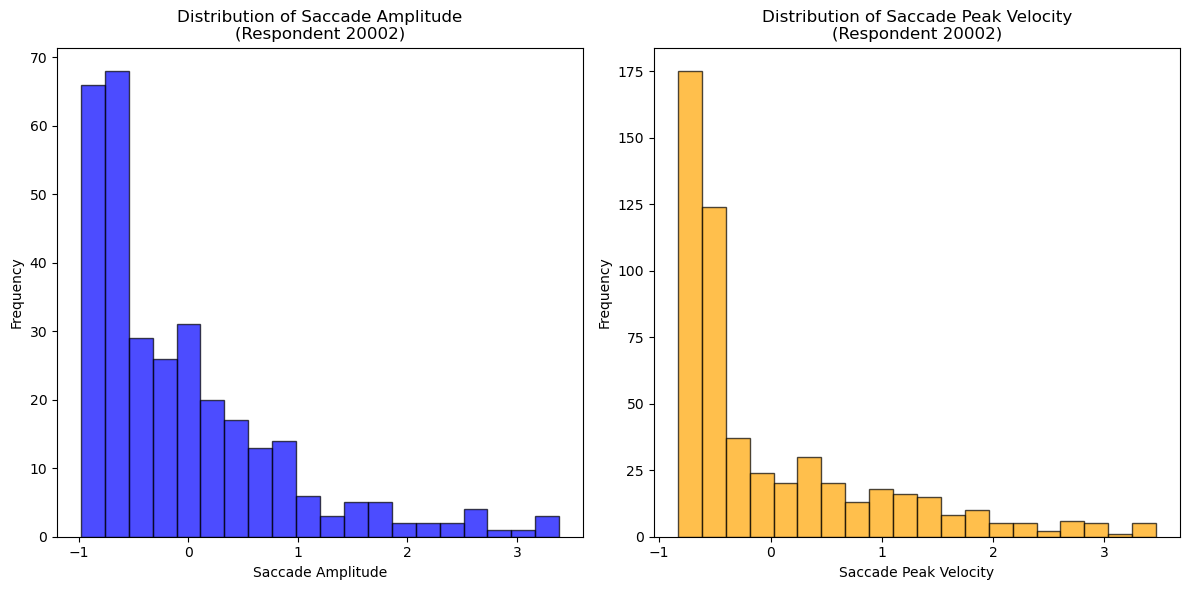

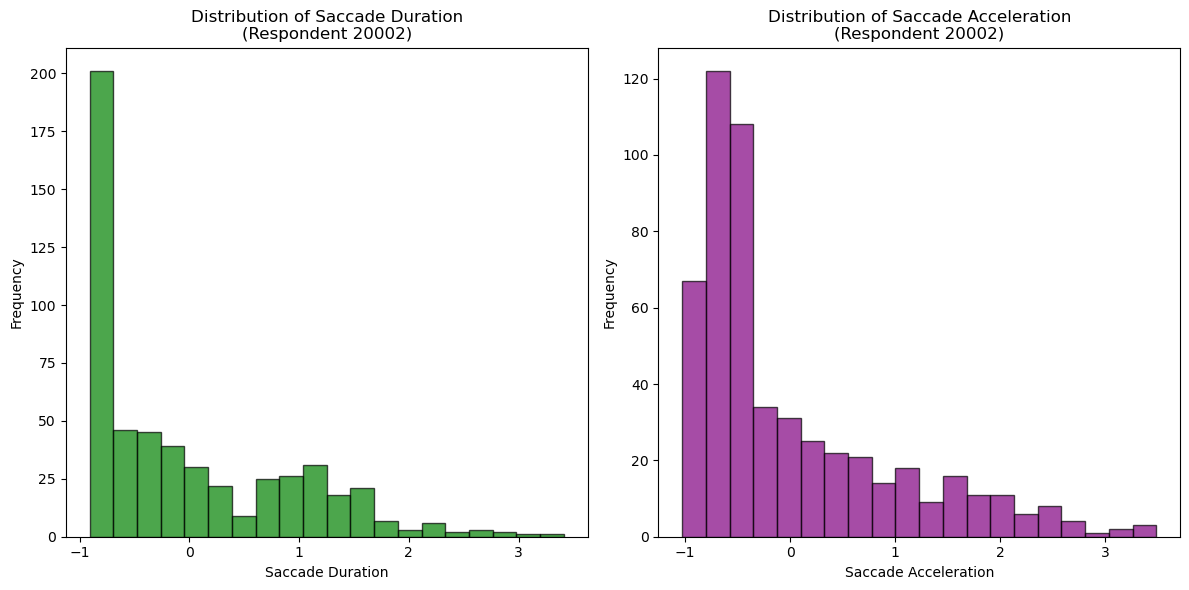

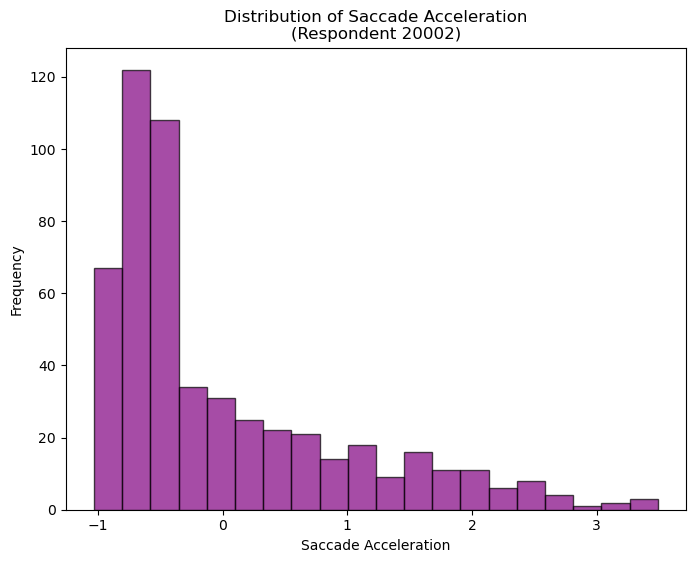

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load your dataset
# plot_df = pd.read_csv("data/saccade_filtered/SaccadeTable_easy1_first.csv", keep_default_na=False)
plot_df = pd.read_csv("../data/saccade_processing/combined_filtered_SaccadeTable_3seconds_middle.csv", keep_default_na=False)
# 2. Filter for Respondent Name = 20002
filtered_df = plot_df[plot_df["Respondent Name"] == 20042]

# 3. Extract relevant columns as floats, ignoring "NA"
saccade_amplitude = pd.to_numeric(filtered_df["Saccade Amplitude"], errors="coerce").dropna()
saccade_peak_velocity = pd.to_numeric(filtered_df["Saccade Peak Velocity"], errors="coerce").dropna()
saccade_duration = pd.to_numeric(filtered_df["Saccade Duration"], errors="coerce").dropna()
saccade_acceleration = pd.to_numeric(filtered_df["Saccade Peak Acceleration"], errors="coerce").dropna()
saccade_deacceleration = pd.to_numeric(filtered_df["Saccade Peak Deceleration"], errors="coerce").dropna()
### **Figure 1: Saccade Amplitude & Saccade Peak Velocity**
plt.figure(figsize=(12, 6))

# Left subplot: Saccade Amplitude
plt.subplot(1, 2, 1)
plt.hist(saccade_amplitude, bins=20, edgecolor="black", alpha=0.7, color="blue")
plt.xlabel("Saccade Amplitude")
plt.ylabel("Frequency")
plt.title("Distribution of Saccade Amplitude\n(Respondent 20002)")

# Right subplot: Saccade Peak Velocity
plt.subplot(1, 2, 2)
plt.hist(saccade_peak_velocity, bins=20, edgecolor="black", alpha=0.7, color="orange")
plt.xlabel("Saccade Peak Velocity")
plt.ylabel("Frequency")
plt.title("Distribution of Saccade Peak Velocity\n(Respondent 20002)")

plt.tight_layout()
plt.show()

### **Figure 2: Saccade Duration**
plt.figure(figsize=(12, 6))

# Left subplot: Saccade Amplitude
plt.subplot(1, 2, 1)
plt.hist(saccade_duration, bins=20, edgecolor="black", alpha=0.7, color="green")
plt.xlabel("Saccade Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Saccade Duration\n(Respondent 20002)")

# Right subplot: Saccade Peak Velocity
plt.subplot(1, 2, 2)
plt.hist(saccade_acceleration, bins=20, edgecolor="black", alpha=0.7, color="purple")
plt.xlabel("Saccade Acceleration")
plt.ylabel("Frequency")
plt.title("Distribution of Saccade Acceleration\n(Respondent 20002)")

plt.tight_layout()
plt.show()

### **Figure 3: Saccade Acceleration**
plt.figure(figsize=(8, 6))
plt.hist(saccade_acceleration, bins=20, edgecolor="black", alpha=0.7, color="purple")
plt.xlabel("Saccade Acceleration")
plt.ylabel("Frequency")
plt.title("Distribution of Saccade Acceleration\n(Respondent 20002)")
plt.show()